# Accessing Argo data by float using Argopy

Although the goal of the Argo Online school is to teach the basics of the Argo data, and therefore, we explain the data using the primary source, it is worth mentioning **argopy**:

<img src="https://raw.githubusercontent.com/euroargodev/argopy/master/docs/_static/argopy_logo_long.png" alt="argopy" width="200"/> is a python library dedicated to Argo data access, manipulation and visualisation for standard users as well as Argo experts. the Argo dataset is very complex: with thousands of different variables, tens of reference tables and a user manual more than 100 pages long: argopy aims to help you navigate this complex realm.

In this notebook we show a few examples, but we refer to the [argopy Gallery](https://argopy.readthedocs.io/en/latest/gallery.html) for a more detailled explanation:

Fist, as usual, import the libraries:

In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import xarray as xr
xr.set_options(display_expand_attrs = False)

Import argopy and set-up a data fetcher:

In [53]:
import argopy
argopy.reset_options()
argopy.clear_cache()

from argopy import DataFetcher  # This is the class to work with Argo data
from argopy.plot import scatter_map, scatter_plot  # Functions to easily make maps and plots

You can load one profile from a float:

In [28]:
ArgoSet = DataFetcher().profile(6901254,1)
apProfile = ArgoSet.load().data

In [29]:
apProfile

<xarray.Dataset>
Dimensions:          (N_POINTS: 148)
Coordinates:
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 6 ... 142 143 144 145 146 147
    LATITUDE         (N_POINTS) float64 29.16 29.16 29.16 ... 29.18 29.18 29.18
    LONGITUDE        (N_POINTS) float64 -15.49 -15.49 -15.49 ... -15.43 -15.43
    TIME             (N_POINTS) datetime64[ns] 2018-10-23T20:54:00 ... 2018-1...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    DATA_MODE        (N_POINTS) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6901254 6901254 ... 6901254 6901254
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 14.0 24.0 34.0 ... 1.988e+03 2.011e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 23.4 23.35 23.33 ... 4.68 4.559 4.474
    TEMP_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

or all the profiles of a given float

In [30]:
ArgoSet = DataFetcher().float([6901254])

In [31]:
apDS = ArgoSet.load().data

Argopy gets all the data, including the metadata in a xarray format: very handy

In [32]:
apDS

<xarray.Dataset>
Dimensions:          (N_POINTS: 15786)
Coordinates:
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 ... 15782 15783 15784 15785
    LATITUDE         (N_POINTS) float64 29.16 29.16 29.16 ... 21.51 21.51 21.51
    LONGITUDE        (N_POINTS) float64 -15.49 -15.49 -15.49 ... -20.96 -20.96
    TIME             (N_POINTS) datetime64[ns] 2018-10-23T20:54:00 ... 2023-0...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int64 1 1 1 1 1 1 1 ... 165 165 165 165 165 165
    DATA_MODE        (N_POINTS) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6901254 6901254 ... 6901254 6901254
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 14.0 24.0 34.0 ... 2.013e+03 2.03e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 23.4 23.35 23.33 ... 3.814 3.759 3.715
    TEMP_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

note that the data is organized in 'points', a 1D array collection of measurements:

In [33]:
apDS.TEMP

<xarray.DataArray 'TEMP' (N_POINTS: 15786)>
array([23.40299988, 23.34799957, 23.33499908, ...,  3.81399989,
        3.75900006,  3.71499991])
Coordinates:
  * N_POINTS   (N_POINTS) int64 0 1 2 3 4 5 ... 15781 15782 15783 15784 15785
    LATITUDE   (N_POINTS) float64 29.16 29.16 29.16 29.16 ... 21.51 21.51 21.51
    LONGITUDE  (N_POINTS) float64 -15.49 -15.49 -15.49 ... -20.96 -20.96 -20.96
    TIME       (N_POINTS) datetime64[ns] 2018-10-23T20:54:00 ... 2023-03-21T0...
Attributes: (7)

However, and for the purpose of the Argo online school is easier to work with the data in [profiles](https://euroargodev.github.io/argoonlineschool/Lessons/L01_TheArgoProgram/Chapter14_OceanographicProfile.html); argopy allows the transformation:

In [34]:
data=apDS.argo.point2profile()
data

<xarray.Dataset>
Dimensions:          (N_PROF: 165, N_LEVELS: 98)
Coordinates:
  * N_PROF           (N_PROF) int64 0 1 2 3 4 5 6 ... 159 160 161 162 163 164
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 91 92 93 94 95 96 97
    LATITUDE         (N_PROF) float64 29.16 29.18 29.17 ... 20.89 21.23 21.51
    LONGITUDE        (N_PROF) float64 -15.49 -15.43 -15.38 ... -20.47 -20.96
    TIME             (N_PROF) datetime64[ns] 2018-10-23T20:54:00 ... 2023-03-...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 1 1 2 3 4 5 6 ... 160 161 162 163 164 165
    DATA_MODE        (N_PROF) <U1 'R' 'R' 'R' 'R' 'R' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901254 6901254 6901254 ... 6901254 6901254
    POSITION_QC      (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    PRES             (N_PROF, N_LEVELS) float64 14.0 24.0 ... 2.013e+03 2.03e+03
    ...               ...
    PSAL_ERROR       (N_PROF) float64 nan nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TEMP             (N_PROF, N_LEVELS) float64 23.4 23.35 23.33 ... 3.759 3.715
    TEMP_ERROR       (N_PROF) float64 nan nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_PROF) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
Attributes: (8)

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC).

Now, let's see how this argopy data set works as a xarray, and it easy to plot any data. Let's begin ploting the first two profiles:

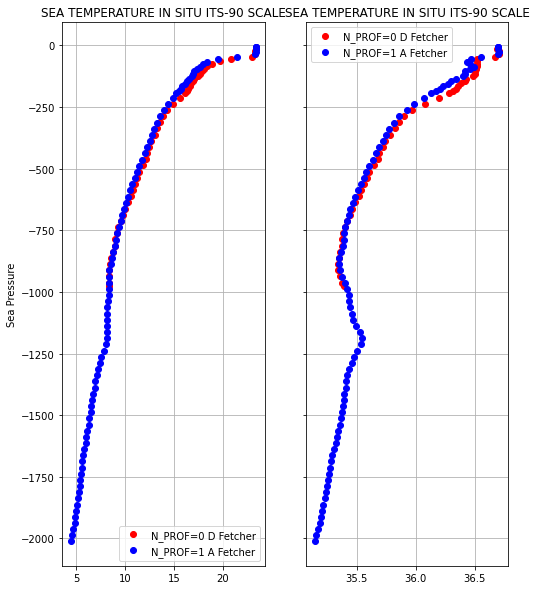

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True)

#Temperature
ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[0].set_title(data['TEMP'].attrs['long_name'])
ax[0].set_ylabel(data['PRES'].attrs['long_name'])
ax[0].grid()
ax[0].legend();

ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].set_title(data['TEMP'].attrs['long_name'])
ax[1].grid()
ax[1].legend();

and of course the locations of these two profiles and the rest of them:

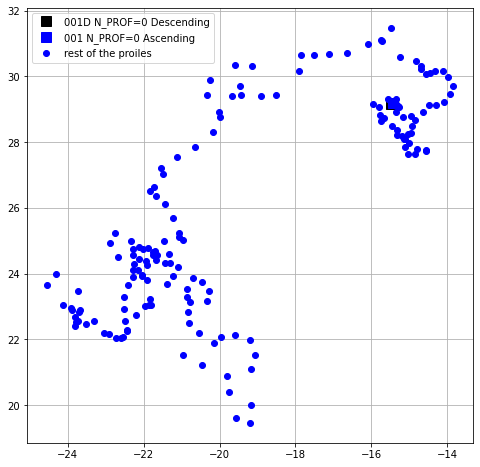

In [40]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data.LONGITUDE[0],data.LATITUDE[0],'ks',markersize=10,label='001D N_PROF=0 Descending')
ax.plot(data.LONGITUDE[1],data.LATITUDE[1],'bs',markersize=10,label='001 N_PROF=0 Ascending')
ax.plot(data.LONGITUDE[2:],data.LATITUDE[2:],'bo',label='rest of the proiles')
ax.grid()
ax.legend();

or using the plotting routines of argopy, easyly we can plot the full trayectory

/Users/pvb/miniconda3/envs/AOS/lib/python3.9/site-packages/argopy/plot/plot.py:409: UserWarning: More than one N_LEVELS found in this dataset, scatter_map will use the first level only
  warnings.warn("More than one N_LEVELS found in this dataset, scatter_map will use the first level only")


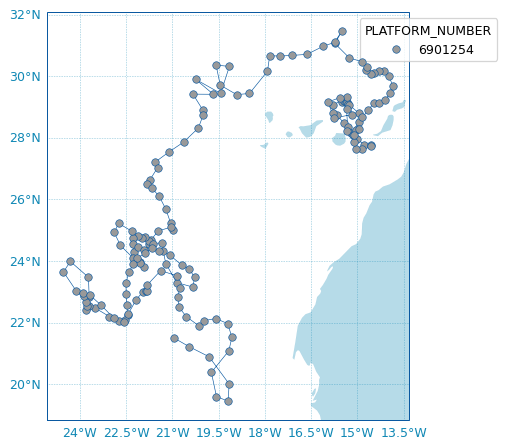

In [59]:
scatter_map(data, set_global=False);

argopy is powerfull with continous updates, an de refer to the [argopy Documentation](https://argopy.readthedocs.io) for a more detailled explanation of its capabilities.